In [2]:
# Add all the imports for data visualization and machine-learning
import sklearn  
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
# Load the csv file into a pandas dataframe
df = pd.read_csv('WineQT.csv')
df = df.drop(columns=["Id"])

In [12]:
# Check the data types for each of the rows
print('------------Data types of each column---------------')
print(df.info())

------------Data types of each column---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB
None


In [13]:
# Print out the first 5 rows just to Check view
print('------------First Five Rows---------------')
print(df.iloc[0:5,:])

------------First Five Rows---------------
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  

<AxesSubplot: >

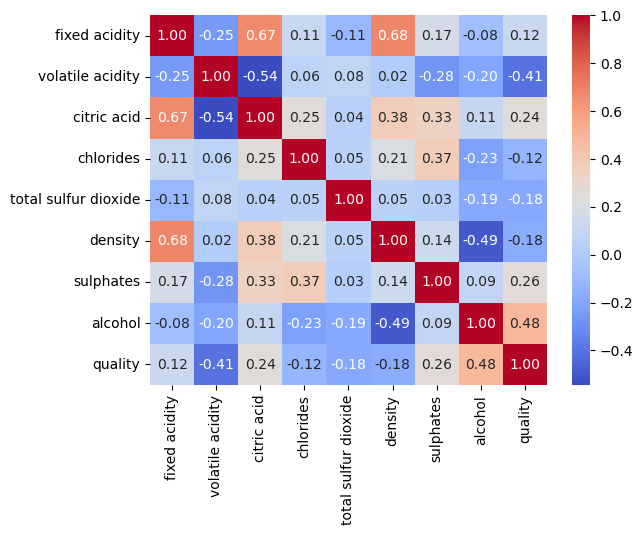

In [27]:
# Correlation heatmap
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap = "coolwarm", annot=True, fmt=".2f")
# Correlation between quality and residual sugar, free sulfer dioxide, or pH are all low (absolute value < 0.1)
# With that in mind we consider dropping these columns from the table
#df = df.drop(columns=["residual sugar"])
#df = df.drop(columns=["free sulfur dioxide"])
#df = df.drop(columns=["pH"])

In [22]:
df

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,6
1139,6.8,0.620,0.08,0.068,38.0,0.99651,0.82,9.5,6
1140,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,5
1141,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,6


In [26]:
# Qualities values only range from 3 to 8, so we should use regression
# Otherwise all predictions will be from 3-8 as opposed to the 1-10 scale
np.unique(df['quality'])

array([3, 4, 5, 6, 7, 8], dtype=int64)